# Abalone: Oceans Phenomenon

*DSCI 100 006 2022W2 - Group Project Proposal - Group 22*

### Introduction

**Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal**
- Abalones are large sea snails found in coastal salt water of New Zealand, Australia, South Africa, Japan and the west coast of North America. Abalone is considered a culinary delicacy because of its rich flavor. Due to the surge of popularity, abalone was nearly brought to extinction. Harvesting abalones are now under strict regulations which lead to a comeback of the abalone population. 

*How can we apply classification to abalones?*
- Abalone is classified into 3 categories of gender, which are male, female and infant. In this project, we will classify by gender, which has applications relating to both economics and sustainability: male and female classification resulted from the different monetary values each category carries. The infant category was established in an effort to maintain abalone sustainability.

**Clearly state the question you will try to answer with your project**

`Question:` *What is the effective gender classification of a given abalone?*
- As stated above, we will define ‘effective gender’ as falling into one of three categories, Male, Female, and Infant. The classification of abalone gender will be determined by factors height, diameter, whole weight, and length.

**Identify and describe the dataset that will be used to answer the question**
- The data set used for this project is the abalone data set provided by UC Irvine Machine Learning Repository. The dataset provides multiple continuous data such as length, diameter, height, whole weight, shucked weight and shell weight as well as nominal data of gender. The wide array of continuous data and the existence of nominal data made this dataset optimal for a classification problem.


### Preliminary exploratory data analysis

In [1]:
### Run this cell before continuing. 
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
## READING AND TIDYING

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"

# read, rename, and mutate as needed
abalone <-  read_csv(url, col_names = FALSE) |>
        rename(sex = X1,
               length = X2,
               diameter = X3,
               height = X4,
               weight = X5, # weight == whole_weight but as we are ignoring the rest we name it as such
               shucked_weight = X6,
               viscera_weight = X7,
               shell_weight = X8,
               rings = X9) |>
        mutate(sex = as.factor(sex), rings = as.integer(rings))

# select the cols with our predictors         
abalone <- abalone |>
    select(sex, length, diameter, height, weight)

abalone

Rows: 4177 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (8): X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


sex,length,diameter,height,weight
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
M,0.455,0.365,0.095,0.5140
M,0.350,0.265,0.090,0.2255
F,0.530,0.420,0.135,0.6770
⋮,⋮,⋮,⋮,⋮
M,0.600,0.475,0.205,1.1760
F,0.625,0.485,0.150,1.0945
M,0.710,0.555,0.195,1.9485


In [3]:
## SPLITTING THE DATA

abalone_split <- initial_split(abalone, prop=0.75, strata=sex)
abalone_train <- training(abalone_split)
abalone_test <- testing(abalone_split)

In [4]:
## SUMMARIZING BY COUNT

abalone_counts <- abalone_train |>
        group_by(sex) |>
        summarize(count = n()) |>
        arrange(by=desc(count))

abalone_counts

sex,count
<fct>,<int>
M,1146
I,1006
F,980


sex,mean_length,mean_diameter,mean_height,mean_weight
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
F,0.5756990,0.4518214,0.1574235,1.0295735
I,0.4296421,0.3277386,0.1080219,0.4348817
M,0.5603970,0.4386082,0.1511475,0.9884442


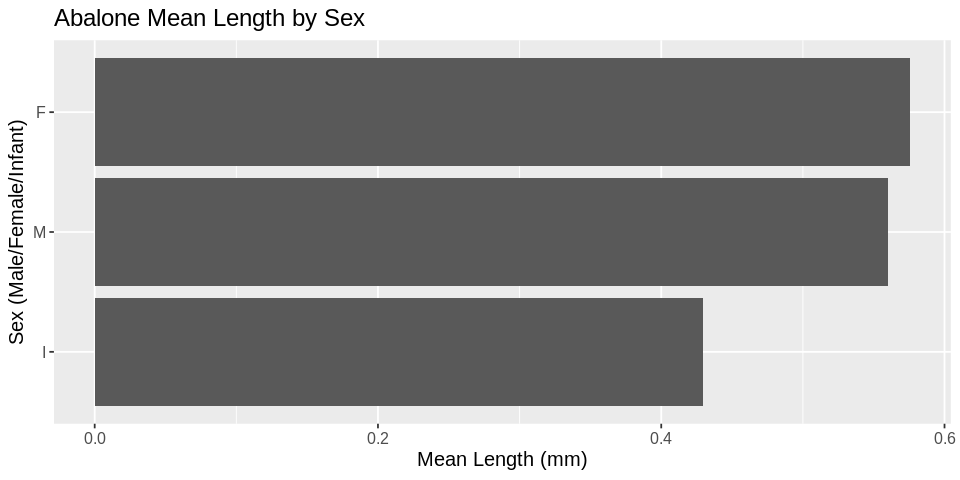

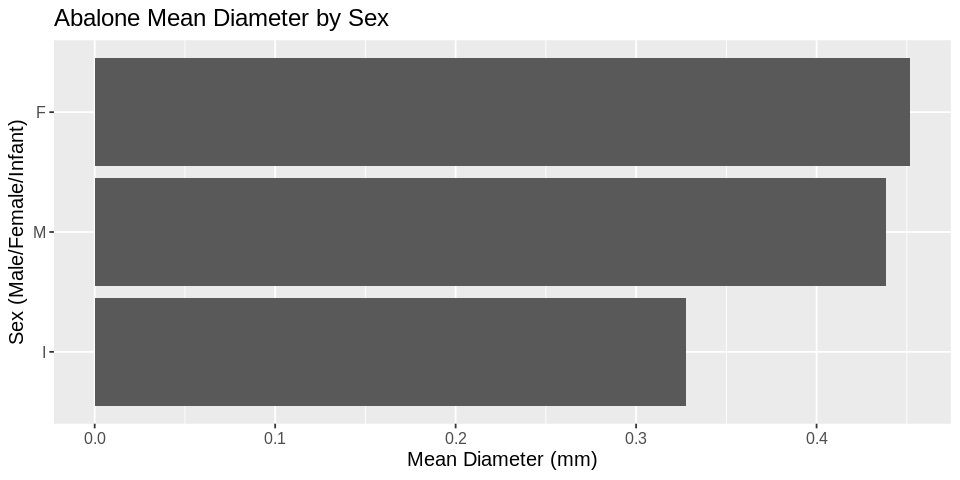

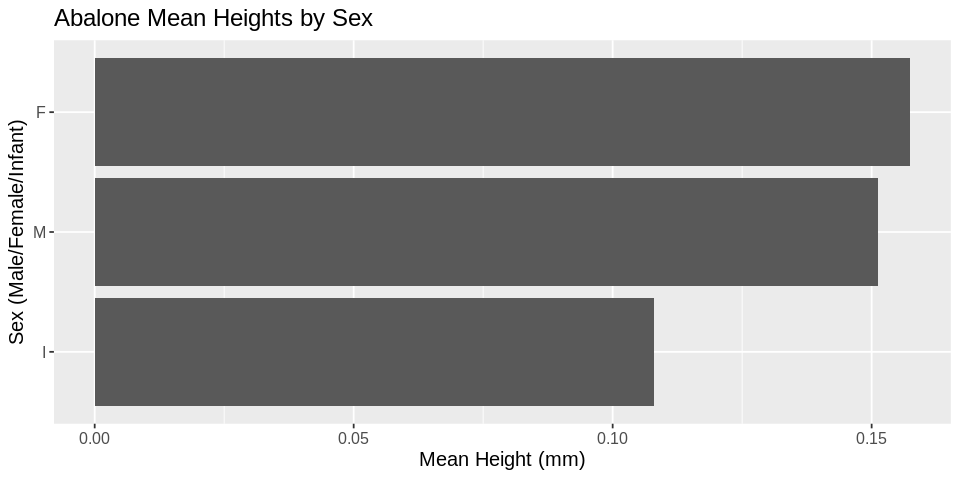

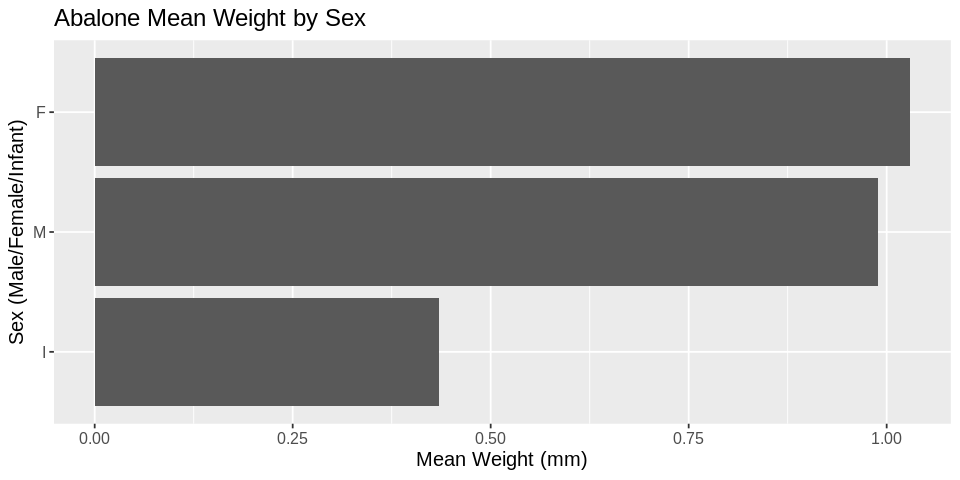

In [9]:
## GRAPHING: HEIGHT VS. WEIGHT BY SEX

options(repr.plot.width = 8, repr.plot.height = 4)

abalone_summarize <- abalone_train |>
        group_by(sex) |>
        summarize(
            mean_length = mean(length),
            mean_diameter = mean(diameter),
            mean_height = mean(height),
            mean_weight = mean(weight)
        )

abalone_summarize


abalone_graph_length <- abalone_summarize |>
        ggplot(aes(x=mean_length, 
                   y=fct_reorder(sex, mean_length))) +
        geom_bar(stat="identity") +
        labs(x = "Mean Length (mm)", y = "Sex (Male/Female/Infant)", title="Abalone Mean Length by Sex") +
        theme(text = element_text(size = 12))

abalone_graph_diameter <- abalone_summarize |>
        ggplot(aes(x=mean_diameter, 
                   y=fct_reorder(sex, mean_diameter))) +
        geom_bar(stat="identity") +
        labs(x = "Mean Diameter (mm)", y = "Sex (Male/Female/Infant)", title="Abalone Mean Diameter by Sex") +
        theme(text = element_text(size = 12))

abalone_graph_height <- abalone_summarize |>
        ggplot(aes(x=mean_height, 
                   y=fct_reorder(sex, mean_height))) +
        geom_bar(stat="identity") +
        labs(x = "Mean Height (mm)", y = "Sex (Male/Female/Infant)", title="Abalone Mean Heights by Sex") +
        theme(text = element_text(size = 12))

abalone_graph_weight <- abalone_summarize |>
        ggplot(aes(x=mean_weight, 
                   y=fct_reorder(sex, mean_weight))) +
        geom_bar(stat="identity") +
        labs(x = "Mean Weight (mm)", y = "Sex (Male/Female/Infant)", title="Abalone Mean Weight by Sex") +
        theme(text = element_text(size = 12))


abalone_graph_length
abalone_graph_diameter
abalone_graph_height
abalone_graph_weight

### Methods
**Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?**

- We will conduct our data analysis by first loading out abalone data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Abalone) into R. We will then divide our data into $75\%$ training data and $25\%$ testing data. After creating a recipe, we will standardize our data (center and scale) focusing on the variables of `length`, `diameter`, `height`, and `weight` (also named `whole_weight` in the original dataset). Next, we will perform the classification of the effective gender by putting the standardized data into a workflow. The workflow will help organize our data by putting together the recipe and our model. With the workflow, we will predict the unknown data and determine our prediction’s accuracy by calculating the distance of the $k$ value and also using the `metrics` and `conf_mat` functions. We will visualize our results with a scatterplot circling a given unknown point (either from the testing data or one that we make up) and the neighbouring $k$ points categorized by colour (for each gender). We can also, for each factor (length, diamter, height, weight), create a histogram of the testing set and colour by gender. This will allow us to visualize the relative mean and the importance of each factor. This will likely require mapping some sort of rounding factor for each observation. By comparing both our visualization and prediction, we will conclude the gender of a given abalone and the mean of each variable for each specific gender.

### Expected Outcomes and Significance

**What do you expect to find?**

- The gender category of new abalones of unknown gender categories based on training data and the new abalones’ dimensions

**What impact could such findings have?**
- Help merchants determine the price of new abalones in a much quicker manner
- Easier and faster to classify new abalones using only their dimension data instead of having to analyze their organs
    - the alternative method requires taking each one out of the water, waiting for it to tire and fall in a certain manner so that the colour of its reproductive organs can be determined. This method may be more accurate but is likely much more time consuming. [(source)](https://www.marinebio.net/marinescience/06future/abrepro.htm)
- More efficient sale and logistics plus other economic benefits for the abalone industry, more knowledge that benefits abalone research

**What future questions could this lead to?**
- What are the characteristics of abalones tagged expensive (i.e. what are the most significant metrics merchants use to price the abalones)?
- What are the evolutionary causes behind certain factors (weight, length) being higher or lower for a certain gender and how could abalone farmers/producers take advantage of these?
